# Sunspot Power Spectral Density
Download Sunspot Data 
from the [Solar Influences Data Analysis Center (SILSO)](https://www.sidc.be/SILSO/home)
and Estimate Power Spectral Density<br>
<br>
["Source: WDC-SILSO, Royal Observatory of Belgium, Brussels"]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

#### Download Sunspot Data
Total sunspot number - Monthly mean total sunspot number [1/1749 - now]<br>
https://www.sidc.be/SILSO/datafiles <br>

Filename: SN_m_tot_V2.0.csv,<br>
Format: Comma Separated values (adapted for import in spreadsheets)<br>
The separator is the semicolon ';'.<br>

Contents:<br>
Column 1-2: Gregorian calendar date<br>
&nbsp;&nbsp;&nbsp;    - Year<br>
&nbsp;&nbsp;&nbsp;    - Month<br>
Column 3: Date in fraction of year.<br>
Column 4: Monthly mean total sunspot number.<br>
Column 5: Monthly mean standard deviation of the input sunspot numbers.<br>
Column 6: Number of observations used to compute the monthly mean total<br>
&nbsp;&nbsp;&nbsp;  sunspot number.<br>
Column 7: Definitive/provisional marker. '1' indicates that the value is definitive. <br>
&nbsp;&nbsp;&nbsp;  '0' indicates that the value is still provisional.<br>

In [2]:
# Monthly mean total sunspot number
filename_url = "https://www.sidc.be/SILSO/DATA/SN_m_tot_V2.0.csv"
filename_csv = "/home/cgreco/data/Sunspots/SN_m_tot_V2.0.csv"
filename = filename_csv
df = pd.read_csv(filename, sep=';', index_col=False, header=None,
    names=["Year","Month","Date","Sunspots","Sunspots_SD","Observations","Provisional"])
print(df)

      Year  Month      Date  Sunspots  Sunspots_SD  Observations  Provisional
0     1749      1  1749.042      96.7         -1.0            -1            1
1     1749      2  1749.123     104.3         -1.0            -1            1
2     1749      3  1749.204     116.7         -1.0            -1            1
3     1749      4  1749.288      92.8         -1.0            -1            1
4     1749      5  1749.371     141.7         -1.0            -1            1
...    ...    ...       ...       ...          ...           ...          ...
3307  2024      8  2024.624     215.5         24.8          1110            0
3308  2024      9  2024.706     141.4         19.4           911            0
3309  2024     10  2024.791     166.4         23.9           893            0
3310  2024     11  2024.873     152.5         20.9           681            0
3311  2024     12  2024.958     154.5         25.6           572            0

[3312 rows x 7 columns]


### Display Sunspot monthly averaged data.

Text(0.5, 1.0, 'Numbers of Sunspots (Monthly Mean Total)')

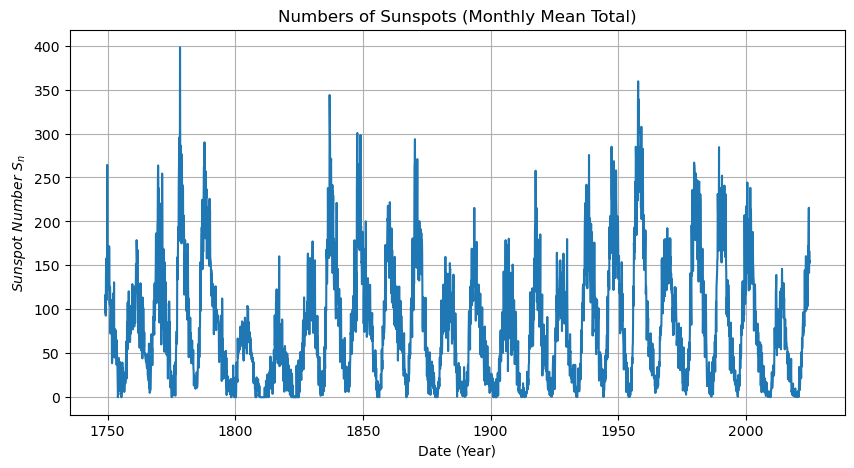

In [3]:
# Display Graph of Sunspots
plt.figure(figsize=(10,5))
plt.plot(df["Date"],df["Sunspots"])
plt.grid()
plt.xlabel("Date (Year)")
plt.ylabel(r"$Sunspot\ Number\ S_n$")
plt.title("Numbers of Sunspots (Monthly Mean Total)")
#plt.show()

Power Spectral Density Estimation

In [4]:
Fs = 12     # Once per month (12 times per year)
NFFT = 2048
f, Pxx = signal.welch(df["Sunspots"].to_numpy(),fs=Fs,window='hann',nperseg=12*80,
    noverlap=12*40,nfft=NFFT,detrend='linear',return_onesided=True,scaling='density')

### Display the Power Spectral Density of the Sunspot Activity

Text(0.2, 20000.0, 'Periods: [56.89 10.67  5.51] Years ')

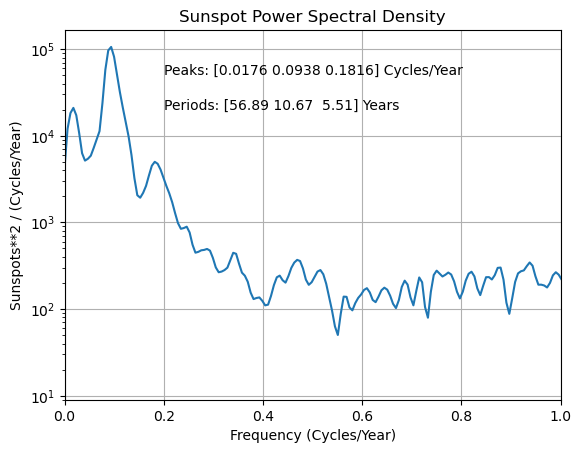

In [5]:
plt.figure()
plt.semilogy(f, Pxx)
plt.xlim(0,1)
plt.grid()
plt.xlabel('Frequency (Cycles/Year)')
plt.ylabel('Sunspots**2 / (Cycles/Year)')
plt.title('Sunspot Power Spectral Density')
end_range = int(0.25*NFFT/12)
peaks, _ = signal.find_peaks(Pxx[0:end_range])
plt.text(0.2,5e4,f'Peaks: {np.around(peaks*Fs/NFFT, decimals=4)} Cycles/Year')
plt.text(0.2,2e4,f'Periods: {np.around(np.reciprocal(peaks*Fs/NFFT), decimals=2)} Years ')
#CyclePeriod = np.around(np.reciprocal(peaks*Fs/NFFT), decimals=2)
#print(f'Sunspot cycle periods: {CyclePeriod} years')